In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai import *
from fastai.vision import *

In [6]:
batch_size = 64

In [28]:
# move from read-only dataset so we can save our models
!cp -r /floyd/input/clabby /floyd/home/fastai/data/cousins

In [7]:
path = Path('/floyd/home/fastai/data/cousins')

In [8]:
!rm /floyd/home/fastai/data/cousins/.DS_Store

rm: cannot remove '/floyd/home/fastai/data/cousins/.DS_Store': No such file or directory


In [9]:
path.ls()

[PosixPath('/floyd/home/fastai/data/cousins/peter'),
 PosixPath('/floyd/home/fastai/data/cousins/models'),
 PosixPath('/floyd/home/fastai/data/cousins/jimmy'),
 PosixPath('/floyd/home/fastai/data/cousins/michael'),
 PosixPath('/floyd/home/fastai/data/cousins/charlie'),
 PosixPath('/floyd/home/fastai/data/cousins/luke'),
 PosixPath('/floyd/home/fastai/data/cousins/brian'),
 PosixPath('/floyd/home/fastai/data/cousins/jack')]

In [33]:
import os
for folder in path.ls():
    i = 1
    label = str(folder).split('/')[-1]
    if label != 'models':
        for photo in folder.ls():
            new_name = f'{str(folder)}/{label}_{i}.png'
            os.rename(photo, new_name)
            i = i + 1

In [10]:
fnames = sorted(Path('/floyd/home/fastai/data/cousins').glob('**/*.png'))

In [11]:
len(fnames)

431

In [30]:
np.random.seed(2)

In [31]:
pat = r'([^/]+)_\d+.png'

In [32]:
import re
p = re.compile(pat)
m = p.search('/floyd/input/fastai/data/cousins/charlie/charlie_15.png').group(1)
print(m)

charlie


In [33]:
path_img = Path('/floyd/home/fastai/data/cousins')

In [34]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=batch_size)

In [35]:
data.normalize(imagenet_stats)

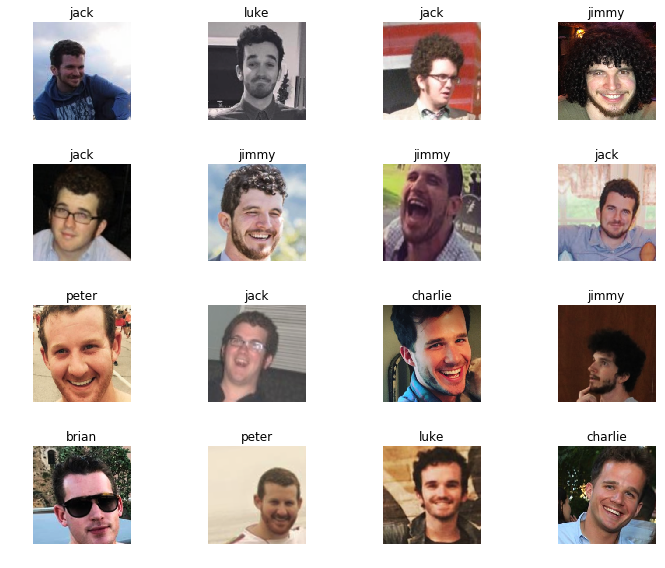

In [36]:
data.show_batch(rows=4, figsize=(10,8))

In [37]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [38]:
learn.fit_one_cycle(4)

Total time: 00:20
epoch  train_loss  valid_loss  error_rate
1      2.286296    1.986469    0.714286    (00:05)
2      1.869626    1.610955    0.559524    (00:05)
3      1.521423    1.385575    0.500000    (00:05)
4      1.299631    1.248374    0.476190    (00:05)



In [39]:
learn.save('clabby-stage-1')

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

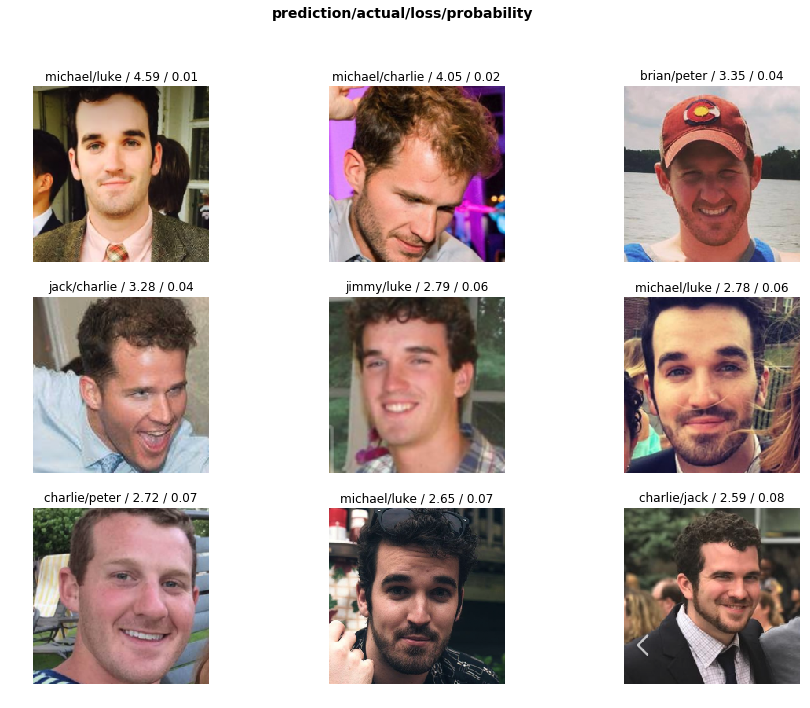

In [41]:
interp.plot_top_losses(9, figsize=(15, 11))

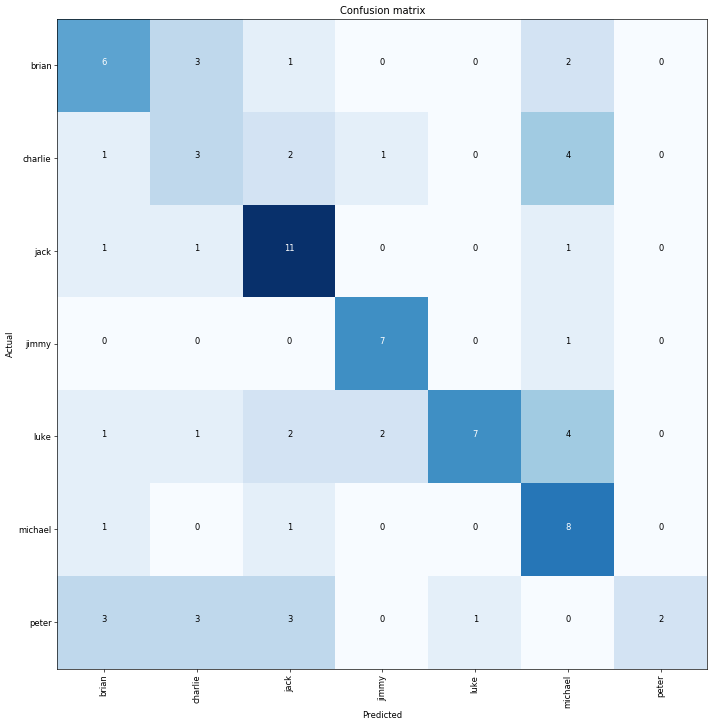

In [43]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [44]:
interp.most_confused(min_val=2)

[('charlie', 'michael', 4),
 ('luke', 'michael', 4),
 ('brian', 'charlie', 3),
 ('peter', 'brian', 3),
 ('peter', 'charlie', 3),
 ('peter', 'jack', 3)]

In [45]:
learn.unfreeze()

In [46]:
learn.fit_one_cycle(1)

Total time: 00:06
epoch  train_loss  valid_loss  error_rate
1      1.062566    2.481708    0.666667    (00:06)



In [64]:
learn.load('clabby-stage-1')

In [56]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


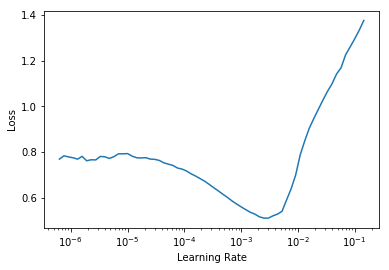

In [57]:
learn.recorder.plot()

In [65]:
learn.unfreeze()

In [66]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-3))

Total time: 01:02
epoch  train_loss  valid_loss  error_rate
1      0.738414    1.041747    0.404762    (00:06)
2      0.675244    0.895166    0.309524    (00:06)
3      0.547727    0.653247    0.202381    (00:06)
4      0.442420    0.660769    0.238095    (00:06)
5      0.360353    0.716579    0.238095    (00:06)
6      0.305215    0.558308    0.166667    (00:06)
7      0.254644    0.497452    0.166667    (00:06)
8      0.215142    0.462239    0.166667    (00:06)
9      0.185740    0.421059    0.142857    (00:06)
10     0.162142    0.400724    0.107143    (00:06)



In [67]:
learn.save('clabby-stage-2')

In [68]:
interp2 = ClassificationInterpretation.from_learner(learn)

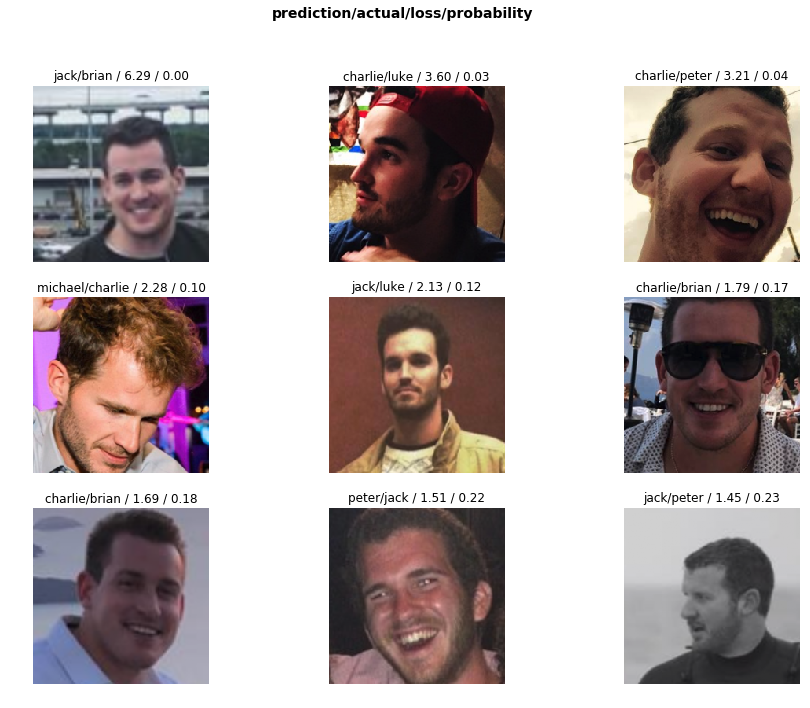

In [69]:
interp2.plot_top_losses(9, figsize=(15,11))

[('charlie', 'michael', 4),
 ('luke', 'michael', 4),
 ('brian', 'charlie', 3),
 ('peter', 'brian', 3),
 ('peter', 'charlie', 3),
 ('peter', 'jack', 3)]

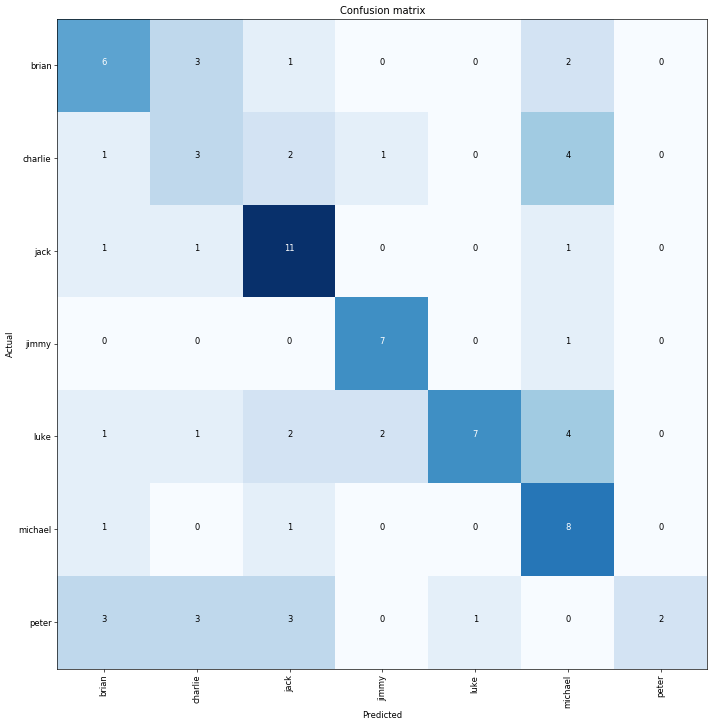

In [71]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)
interp.most_confused(min_val=2)

# Trying resnet50

In [72]:
data50 = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=batch_size//2)

In [73]:
learn50 = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 38700065.54it/s]


In [74]:
learn50.fit_one_cycle(8)

Total time: 01:17
epoch  train_loss  valid_loss  error_rate
1      2.175340    1.898348    0.702381    (00:19)
2      1.618925    1.795399    0.630952    (00:08)
3      1.255665    1.478175    0.535714    (00:08)
4      1.027392    1.239154    0.452381    (00:08)
5      0.844360    1.143292    0.392857    (00:08)
6      0.723745    1.119733    0.392857    (00:08)
7      0.628795    1.103083    0.380952    (00:08)
8      0.551429    1.102097    0.392857    (00:08)



In [75]:
learn50.save('clabby-resnet50-stage-1')

In [76]:
interp50 = ClassificationInterpretation.from_learner(learn50)

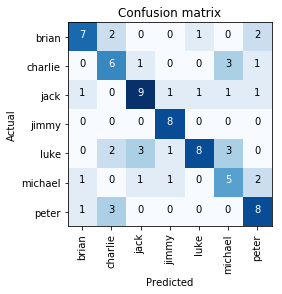

In [77]:
interp50.plot_confusion_matrix()

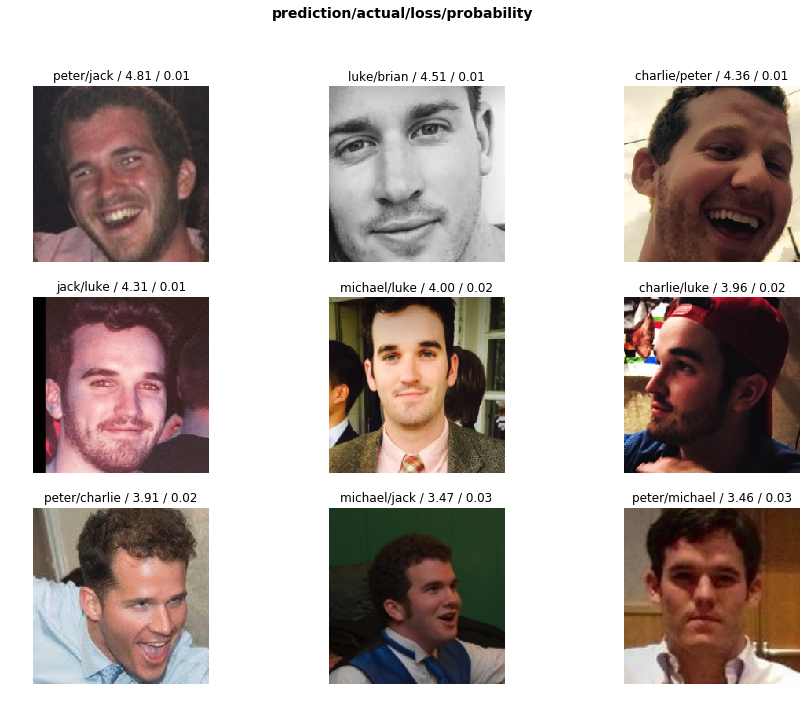

In [78]:
interp50.plot_top_losses(9, figsize=(15,11))

In [79]:
interp50.most_confused(min_val=2)

[('charlie', 'michael', 3),
 ('luke', 'jack', 3),
 ('luke', 'michael', 3),
 ('peter', 'charlie', 3)]

## Putting in production

In [116]:
classes = ['brian', 'charlie', 'jack', 'jimmy', 'luke', 'michael', 'peter']

In [117]:
classes

['brian', 'charlie', 'jack', 'jimmy', 'luke', 'michael', 'peter']

In [118]:
serve_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [119]:
serve_learn = create_cnn(serve_data, models.resnet34)

In [120]:
serve_learn.load('clabby-stage-2')

In [121]:
img = open_image('/floyd/home/week-1/img2.jpg')

In [3]:
type(img)

NameError: name 'img' is not defined

In [123]:
pred_class, pred_idx,outputs = serve_learn.predict(img)

In [124]:
pred_class

'charlie'

In [125]:
pred_idx

tensor(1)

In [126]:
outputs

tensor([  0.9503, 544.3062,   0.9197,   0.1491,   0.3265,   0.4900,   0.0514])

In [127]:
classes

['brian', 'charlie', 'jack', 'jimmy', 'luke', 'michael', 'peter']

In [128]:
facts = {
    'charlie': [
        'ask him about the fast.ai course',
        'he loves pizza - go with that',
    ],
    'jack': [
        'loves reading books',
        'his fi'
    ]
}

In [129]:
import random
random.choice(facts[pred_class])


'he loves pizza - go with that'